In [45]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [46]:
import warnings 
warnings.filterwarnings("ignore")

In [47]:
df=pd.read_csv(r'C:\ML-Projects\AIML DATASET.csv')

In [48]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [50]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [53]:
df.shape[0]

6362620

In [54]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [55]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [56]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [57]:
df['isFraud'].value_counts()[1]/df.shape[0]

np.float64(0.001290820448180152)

Text(0, 0.5, 'Number of transactions')

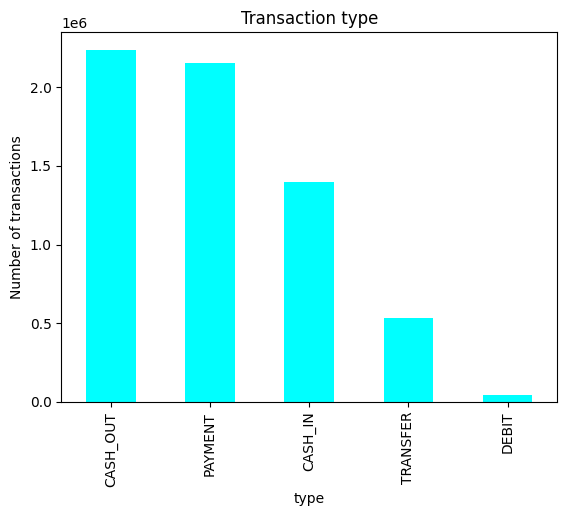

In [58]:
df['type'].value_counts().plot(kind='bar',color='cyan')
plt.title('Transaction type')
plt.ylabel('Number of transactions')

<Axes: xlabel='type'>

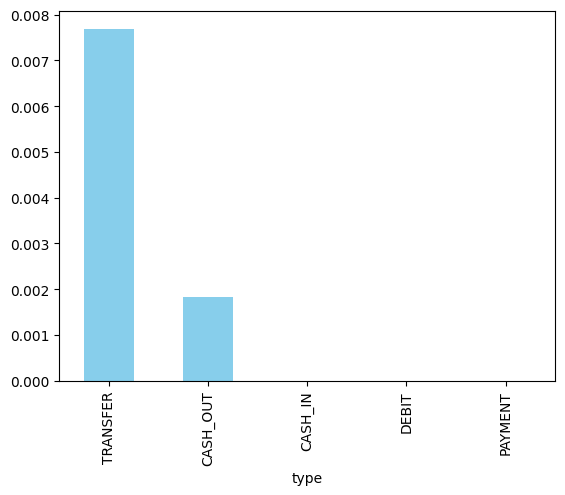

In [59]:
Fruad_type=df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
Fruad_type.plot(kind='bar',color='Skyblue')

In [60]:
#sns.histplot(np.log1p(df['amount']),bins=100, kde= True,color = 'green')
#plt.title('Transaction amout distribution(log scale)')
#plt.xlabel('Log(amount + 1)')
#plt.show()

Text(0.5, 1.0, 'amount vs isFraud(filtred under 20k)')

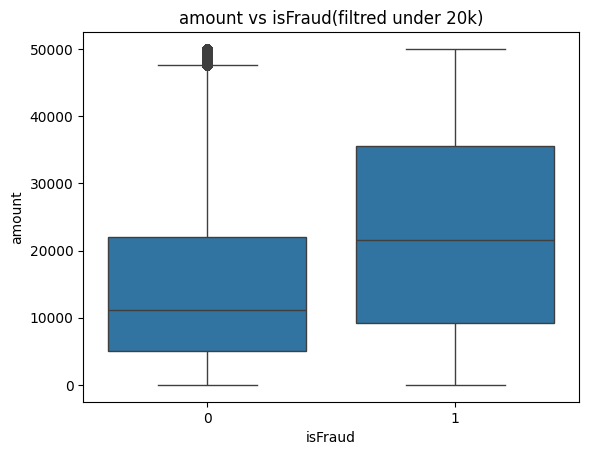

In [61]:
sns.boxplot(data=df[df['amount']<50000],x='isFraud',y='amount')
plt.title('amount vs isFraud(filtred under 20k)')


In [62]:
df['diffbalanceorig']=df['oldbalanceOrg']-df['newbalanceOrig']
df['diffbalanceDest']=df['newbalanceDest']-df['oldbalanceDest']

In [63]:
df['diffbalanceDest']



0                0.00
1                0.00
2                0.00
3           -21182.00
4                0.00
              ...    
6362615     339682.13
6362616          0.00
6362617    6311409.27
6362618          0.00
6362619     850002.52
Name: diffbalanceDest, Length: 6362620, dtype: float64

In [64]:
(df['diffbalanceorig']<0).sum()


np.int64(1399253)

In [65]:
(df['diffbalanceDest']<0).sum()

np.int64(1238864)

In [66]:
df.drop(columns='step',inplace=True)

In [67]:
top_senders = df['nameOrig'].value_counts().head(10)

In [68]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [69]:
top_reciveres = df['nameDest'].value_counts().head(10
                                                )

In [70]:
top_reciveres

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [71]:
fruad_users = df[df["isFraud"]== 1]['nameOrig'].value_counts().head(10)

In [72]:
fruad_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [73]:
corr = df[ ['amount','oldbalanceDest','newbalanceDest','oldbalanceOrg','newbalanceOrig','isFraud']].corr()

In [74]:
corr

,amount,oldbalanceDest,newbalanceDest,oldbalanceOrg,newbalanceOrig,isFraud
amount,1.000000,0.294137,0.459304,-0.002762,-0.007861,0.076688
oldbalanceDest,0.294137,1.000000,0.976569,0.066243,0.067812,-0.005885
newbalanceDest,0.459304,0.976569,1.000000,0.042029,0.041837,0.000535
oldbalanceOrg,-0.002762,0.066243,0.042029,1.000000,0.998803,0.010154
newbalanceOrig,-0.007861,0.067812,0.041837,0.998803,1.000000,-0.008148
isFraud,0.076688,-0.005885,0.000535,0.010154,-0.008148,1.000000


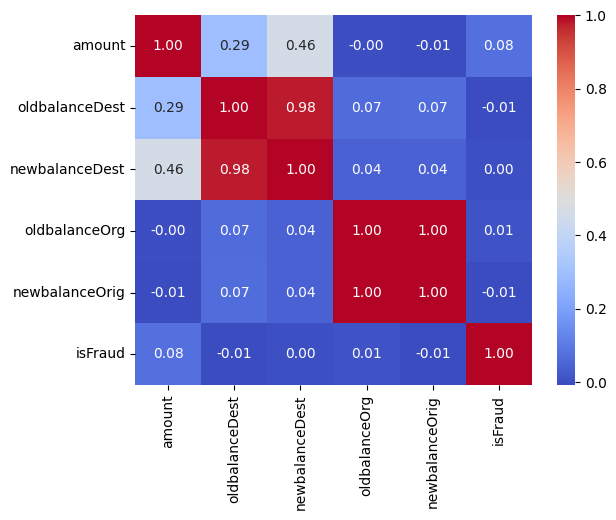

In [75]:
sns.heatmap(corr,annot=True,cmap ='coolwarm',fmt = '.2f')
plt.show()

In [76]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffbalanceorig,diffbalanceDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [77]:
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

In [78]:
# Define feature types
categorical = ['type']
numeric = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
           'newbalanceDest']

In [79]:

# Define target and features
y = df['isFraud']
X = df.drop('isFraud',axis=1)

In [80]:
# Train-test split with stratify to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)


In [81]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ]
)


In [82]:
# Full pipeline with classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced',max_iter=1000))
])

In [83]:
# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [84]:
print("Train Accuracy:", pipeline.score(X_train, y_train))
print("Test Accuracy:", pipeline.score(X_test, y_test))

Train Accuracy: 0.9461175191980662
Test Accuracy: 0.9460961050636373


In [85]:
y_pred=pipeline.predict(X_test)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.94      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



In [87]:
confusion_matrix(y_test,y_pred)

array([[1202380,   68501],
       [     93,    1550]])

In [88]:
import joblib
joblib.dump(pipeline,'fraud_dectection.pkl')

['fraud_dectection.pkl']